In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import collections
from tqdm import trange
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

font = {        'size'   : 15}
import matplotlib
matplotlib.rc('font', **font)

import pandas as pd

import os
from cooperate_defect_module import evolve

In [3]:
# ER

N = 20
T = int(10*N*(N-1)/2)
runs = 100
C = 15

t_s = [1,1,1,2,5,10,25,50,100,0]
eta = [5,2,1,1,1,1,1,1,1,1]
s = ['0.2','0.5','1','2','5','10','25','50','100','inf']

v_c = [0.5,0.2]
extra = ['_10taug']
for j in range(1):
    for i in range(len(s)):
        avg_payoffs = np.zeros((runs,T+1))
        cooperators = np.zeros((runs,T+1))
        for r in trange(runs):
            g = nx.gnp_random_graph(N,0.2)
            cooperate = np.random.choice(range(N),size=C,replace=False)
            nx.set_node_attributes(g,{n:int(n in cooperate) for n in range(N)},'C')
            payoffs,cooperators[r,:] = evolve(g,T,graph=False,zeta=t_s[i],eta=eta[i],cooperator=True,tie_update=2)
            avg_payoffs[r,:] = np.mean(payoffs,axis=0)
#         pd.DataFrame(avg_payoffs).to_csv('Data/Imitate/Tie2/ER/payoff_'+s[i]+extra[j]+'.csv',header=None,index=None)
#         pd.DataFrame(cooperators).to_csv('Data/Imitate/Tie2/ER/cooperator_'+s[i]+extra[j]+'.csv',header=None,index=None)

  4%|▍         | 4/100 [00:02<00:53,  1.81it/s]


KeyboardInterrupt: 

Text(0.06, 0.5, 'Average Payoff $\\bar{\\pi}$')

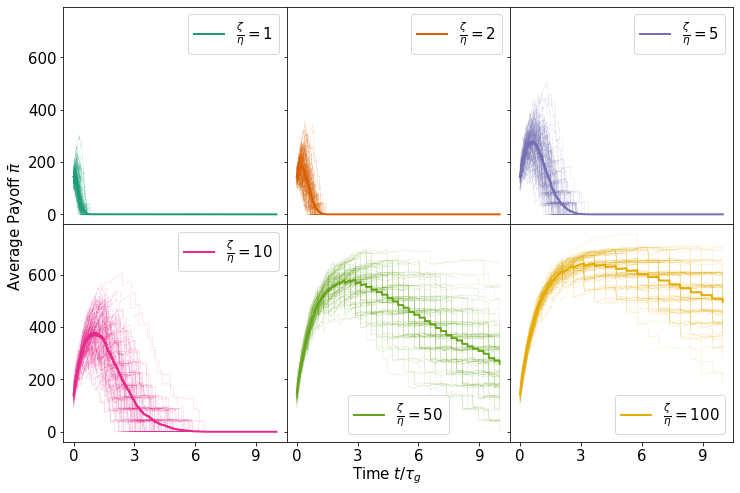

In [60]:
s = ['1','2','5','10','50','100']
IC = [pd.read_csv('Data/Imitate/Tie2/ER/payoff_'+s[i]+'_10taug.csv',header=None).to_numpy() for i in range(6)]
N = 20
T = int(10*N*(N-1)/2)
runs = 100
C = 15
# c = ['r','g','b','orange','purple','k']
fig,axs = plt.subplots(figsize=(12,8),ncols=3,nrows=2,sharey=True,sharex=True)
c=sns.color_palette('Dark2',6)
for i,ic in enumerate(IC):
    for r in range(runs):
        axs[i//3,i%3].plot(np.arange(T+1)/(T/10),ic[r,:],lw=0.09,c=c[i])
    axs[i//3,i%3].plot(np.arange(T+1)/(T/10),np.mean(ic,axis=0),c=c[i],label=r'$\frac{\zeta}{\eta}=$'+s[i],lw=2)
    axs[i//3,i%3].set_xticks([0,3,6,9])
    axs[i//3,i%3].legend()

# plt.legend(ncol=1,loc=(0.02,0.2))
# plt.plot(np.arange(T+1)/(T/5),energy_evolution(C,N,T,C*(C-1)/2,0),c='yellow')
# plt.plot(np.arange(T+1)/(T/5),energy_evolution(N,N,T,C*(C-1)/2,0),c='yellow')
# plt.xscale('log')
# plt.xlim([0,1])
# plt.ylim([0,650])
fig.subplots_adjust(wspace=0,hspace=0)
# axs[0].set_yticks([0,250,500,750])
# axs[0].set_ylabel(r"Average Payoff $\bar{\pi}$")
fig.text(0.5, 0.06, r"Time $t / \tau_g$", ha='center')
fig.text(0.06, 0.5, r"Average Payoff $\bar{\pi}$", va='center', rotation='vertical')
# fig.savefig('Data/'+name+'/'+name+'_evol_2x3.png',bbox_inches='tight')
# fig.tight_layout()

In [54]:
print(int(s[0]))

1


In [43]:
N = 20
T = N*(N-1)/2
s = ['0.2','0.5','1','2','5','10','25','50']
names = ['Experiment 2','Tie2']
# payoff_tmeans = [[pd.read_csv('Data/Imitate/'+names[j]+'/'+s[i]+'.csv',header=None).to_numpy()[:,:int(T)].mean() 
#                   for i in range(len(s))] for j in range(len(names))]

payoff_tmeans = [[pd.read_csv('Data/Imitate/'+names[j]+'/ER/payoff_'+s[i]+'.csv',header=None).to_numpy()[:,-1].mean() 
                  for i in range(len(s))] for j in range(len(names))]
payoff_tstd = [[pd.read_csv('Data/Imitate/'+names[j]+'/ER/payoff_'+s[i]+'.csv',header=None).to_numpy()[:,-1].std() 
                  for i in range(len(s))] for j in range(len(names))]
cooperator_tmeans = [[pd.read_csv('Data/Imitate/'+names[j]+'/ER/cooperator_'+s[i]+'.csv',header=None).to_numpy()[:,-1].mean() 
                  for i in range(len(s))] for j in range(len(names))]
cooperator_tstd = [[pd.read_csv('Data/Imitate/'+names[j]+'/ER/cooperator_'+s[i]+'.csv',header=None).to_numpy()[:,-1].std() 
                  for i in range(len(s))] for j in range(len(names))]

Text(0, 0.5, 'Average Payoff $<\\bar{\\pi}>_t$')

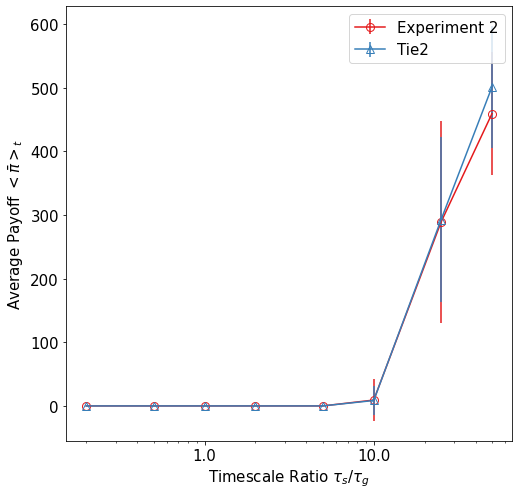

In [44]:
# plt.style.use('default')
c=sns.color_palette('Set1',len(names))
marker=['o','^','s','p','H','d','*']
fig = plt.figure(figsize=(8,8))
for j in range(len(names)):
#     plt.plot([0.2,0.5,1,2,5,10,25,50],cooperator_tmeans[j],color=c[j],
#              marker=marker[j],label=names[j],markerfacecolor="None",ms=8)
    plt.errorbar([0.2,0.5,1,2,5,10,25,50],payoff_tmeans[j],yerr=payoff_tstd[j],color=c[j],
             marker=marker[j],label=names[j],markerfacecolor="None",ms=8)
plt.legend()
plt.xscale('log')
plt.gca().xaxis.set_major_formatter(ScalarFormatter())
# plt.yscale('log')
plt.xlabel(r"Timescale Ratio $\tau_s/\tau_g$")

plt.ylabel(r"Average Payoff $<\bar{\pi}>_t$")
# plt.ylabel(r"Fraction of Cooperators $<C>_t$")

# fig.text(0.2,0.3,'Fixed\n Network',horizontalalignment='center')
# plt.arrow(0.4,0.17,-0.2,0,width=0.005,head_width=0.02,color='red')
# fig.text(0.8,0.3,'Fixed\n Strategy',horizontalalignment='center')
# plt.arrow(38,0.17,40,0,width=0.005,head_width=0.02,color='red',head_length=10)
# fig.savefig("Data/Imitate/Experiment 2/Last T Mean Cooperator.png",bbox_inches='tight')

In [19]:
def oops(**kwargs):
    print(kwargs)
    f=kwargs['f']
    print('it works?', f)



In [14]:
def next_oops():
    f = 5
    oops(f)

In [20]:
oops(name=5,f=20)

{'name': 5, 'f': 20}
it works? 20
